<a href="https://colab.research.google.com/github/NatanRod99/Desafio_bix/blob/main/C%C3%B3pia_de_Desafio_Bix_Tec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score

In [ ]:
# Fazendo o carregamento dos dados
df_previous_years = pd.read_csv("/content/air_system_previous_years.csv")
df_present_year = pd.read_csv("/content/air_system_present_year.csv")

In [ ]:
df_previous_years.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [ ]:
df_present_year.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [ ]:
df_previous_years.values

array([['neg', 76698, 'na', ..., '0', '0', '0'],
       ['neg', 33058, 'na', ..., '1500', '0', '0'],
       ['neg', 41040, 'na', ..., '514', '0', '0'],
       ...,
       ['neg', 112, '0', ..., '0', '0', '0'],
       ['neg', 80292, 'na', ..., '388422', '0', '0'],
       ['neg', 40222, 'na', ..., '158', '0', '0']], dtype=object)

In [ ]:
df_present_year.values

array([['neg', 60, '0', ..., '0', '0', '0'],
       ['neg', 82, '0', ..., '0', '0', '0'],
       ['neg', 66002, '2', ..., '0', '0', '0'],
       ...,
       ['neg', 79636, 'na', ..., '19548', '0', '0'],
       ['neg', 110, 'na', ..., '0', '0', '0'],
       ['neg', 8, '0', ..., '0', '0', '0']], dtype=object)

In [ ]:
df_previous_years.shape

(60000, 171)

In [ ]:
df_present_year.shape

(16000, 171)

In [ ]:
df_previous_years.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


In [ ]:
df_present_year.describe()

,aa_000
count,1.600000e+04
mean,6.799698e+04
std,5.035350e+05
min,0.000000e+00
25%,9.280000e+02
50%,3.098200e+04
75%,4.947900e+04
max,4.294967e+07


In [ ]:
# Análise exploratória inicial
print("/content/air_system_previous_years.csv:")
print(df_previous_years.info())

/content/air_system_previous_years.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB
None


In [ ]:
# Análise exploratória inicial
print("/content/air_system_present_year.csv:")
print(df_previous_years.info())

/content/air_system_present_year.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB
None


In [ ]:
df = pd.concat([df_previous_years, df_present_year])

In [ ]:
# Verificar a quantidade total de caminhões
total_caminhoes = df.shape[0]
print(f"Quantidade total de caminhões: {total_caminhoes}")

# Verificar a quantidade de caminhões com defeito
caminhoes_com_defeito = df[df['class'] == 1].shape[0]
print(f"Quantidade de caminhões com defeito: {caminhoes_com_defeito}")

# Calcular o percentual de caminhões com defeito
percentual_com_defeito = (caminhoes_com_defeito / total_caminhoes) * 100
print(f"Percentual de caminhões com defeito: {percentual_com_defeito:.2f}%")


Quantidade total de caminhões: 76000
Quantidade de caminhões com defeito: 1375
Percentual de caminhões com defeito: 1.81%


In [ ]:
# Calcular a média, mediana e desvio padrão da coluna 'ee_003'
media_ee_003 = df['ee_003'].mean()
mediana_ee_003 = df['ee_003'].median()
desvio_padrao_ee_003 = df['ee_003'].std()

print(f"Média da ee_003: {media_ee_003:.2f}")
print(f"Mediana da ee_003: {mediana_ee_003:.2f}")
print(f"Desvio padrão da ee_003: {desvio_padrao_ee_003:.2f}")


Média da ee_003: 13449.55
Mediana da ee_003: 11089.00
Desvio padrão da ee_003: 9665.45


In [ ]:
# Calcular a média, mediana e desvio padrão da coluna 'ee_003' ignorando os valores nulos
media_ee_003 = df['ee_003'].mean(skipna=True)
mediana_ee_003 = df['ee_003'].median(skipna=True)
desvio_padrao_ee_003 = df['ee_003'].std(skipna=True)

print(f"Média da ee_003: {media_ee_003:.2f}")
print(f"Mediana da ee_003: {mediana_ee_003:.2f}")
print(f"Desvio padrão da ee_003: {desvio_padrao_ee_003:.2f}")


Média da ee_003: 13449.55
Mediana da ee_003: 11089.00
Desvio padrão da ee_003: 9665.45


In [ ]:
# Calcular a média, mediana e desvio padrão da coluna 'ee_003' ignorando os valores nulos
media_ag_002 = df['ag_002'].mean(skipna=True)
mediana_ag_002 = df['ag_002'].median(skipna=True)
desvio_padrao_ag_002 = df['ag_002'].std(skipna=True)

print(f"Média da ag_002: {media_ag_002:.2f}")
print(f"Mediana da ag_002: {mediana_ag_002:.2f}")
print(f"Desvio padrão da ag_002: {desvio_padrao_ag_002:.2f}")

Média da ag_002: 55.01
Mediana da ag_002: 0.00
Desvio padrão da ag_002: 284.84


In [ ]:
# Preencher valores nulos com a mediana das colunas 'ag002' e 'ee007'
df['ag_002'] = df['ag_002'].fillna(df['ag_002'].median())
df['ee_007'] = df['ee_007'].fillna(df['ee_007'].median())

# Calcular o coeficiente de correlação entre 'ag002' e 'ee007'
correlation = df['ag_002'].corr(df['ee_007'])

print(f"Coeficiente de correlação entre ag002 e ee007: {correlation:.4f}")


Coeficiente de correlação entre ag002 e ee007: 0.0825


In [ ]:
# Calcular o coeficiente de correlação entre 'ag002' e 'ee007' ignorando valores nulos
correlation = df['ag_002'].corr(df['ee_007'])

print(f"Coeficiente de correlação entre ag002 e ee007: {correlation:.4f}")


Coeficiente de correlação entre ag002 e ee007: 0.0825


In [ ]:
# Calcular o coeficiente de correlação de Pearson entre 'ee005' e 'ac000'
correlation = df['ee_005'].corr(df['ac_000'])

print(f"Coeficiente de correlação de Pearson entre ee005 e ac000: {correlation:.4f}")

Coeficiente de correlação de Pearson entre ee005 e ac000: 0.0884


In [ ]:
# Carregar os dados (ajuste o caminho para o seu dataset)
df_previous_years = pd.read_csv("/content/air_system_previous_years.csv")
df_present_year = pd.read_csv("/content/air_system_present_year.csv")

# Substituir 'na' por NaN
df_previous_years = df_previous_years.replace('na', np.nan)
df_present_year = df_present_year.replace('na', np.nan)

# Converter colunas para tipos numéricos
df_previous_years['ee_005'] = pd.to_numeric(df_previous_years['ee_005'], errors='coerce')
df_previous_years['ac_000'] = pd.to_numeric(df_previous_years['ac_000'], errors='coerce')

df_present_year['ee_005'] = pd.to_numeric(df_present_year['ee_005'], errors='coerce')
df_present_year['ac_000'] = pd.to_numeric(df_present_year['ac_000'], errors='coerce')

# Preencher valores nulos com a mediana das colunas 'ee_005' e 'ac_000' nos datasets separadamente
df_previous_years['ee_005'] = df_previous_years['ee_005'].fillna(df_previous_years['ee_005'].median())
df_previous_years['ac_000'] = df_previous_years['ac_000'].fillna(df_previous_years['ac_000'].median())

df_present_year['ee_005'] = df_present_year['ee_005'].fillna(df_present_year['ee_005'].median())
df_present_year['ac_000'] = df_present_year['ac_000'].fillna(df_present_year['ac_000'].median())

# Calcular o coeficiente de correlação de Pearson entre 'ee_005' e 'ac_000' para os anos anteriores
correlation_previous_years = df_previous_years['ee_005'].corr(df_previous_years['ac_000'])

# Calcular o coeficiente de correlação de Pearson entre 'ee_005' e 'ac_000' para o ano presente
correlation_present_year = df_present_year['ee_005'].corr(df_present_year['ac_000'])

print(f"Coeficiente de correlação de Pearson entre ee_005 e ac_000 nos anos anteriores: {correlation_previous_years:.4f}")
print(f"Coeficiente de correlação de Pearson entre ee_005 e ac_000 no ano presente: {correlation_present_year:.4f}")



Coeficiente de correlação de Pearson entre ee_005 e ac_000 nos anos anteriores: -0.0396
Coeficiente de correlação de Pearson entre ee_005 e ac_000 no ano presente: -0.0477


In [ ]:
df = pd.concat([df_previous_years, df_present_year])

# Substituir 'na' por NaN, se necessário
df = df.replace('na', np.nan)

# Converter 'ad_000' para tipo numérico
df['ad_000'] = pd.to_numeric(df['ad_000'], errors='coerce')

# Remover linhas onde 'ad_000' é NaN
df = df.dropna(subset=['ad_000'])

# Agrupar por 'class' e calcular a mediana de 'ad_000'
median_by_class = df.groupby('class')['ad_000'].median()

print(median_by_class)


class
neg    126.0
pos    648.0
Name: ad_000, dtype: float64


In [ ]:
# Converter 'ee_001' para tipo numérico
df['ee_001'] = pd.to_numeric(df['ee_001'], errors='coerce')

# Remover linhas onde 'ee_001' é NaN
df = df.dropna(subset=['ee_001'])

# Agrupar por 'class' e calcular a média de 'ee_001'
mean_by_class = df.groupby('class')['ee_001'].mean()

print(mean_by_class)


class
neg    4.561012e+05
pos    3.742243e+06
Name: ee_001, dtype: float64


In [ ]:
# Carregar os dados (ajuste o caminho para os seus arquivos)
df_previous_years = pd.read_csv("/content/air_system_previous_years.csv")
df_present_year = pd.read_csv("/content/air_system_present_year.csv")

# Substituir 'na' por NaN e converter 'ee_001' para tipo numérico
for df in [df_previous_years, df_present_year]:
    df.replace('na', np.nan, inplace=True)
    df['ee_001'] = pd.to_numeric(df['ee_001'], errors='coerce')

# Remover linhas onde 'ee_001' é NaN
df_previous_years = df_previous_years.dropna(subset=['ee_001'])
df_present_year = df_present_year.dropna(subset=['ee_001'])

# Agrupar por 'class' e calcular a média de 'ee_001'
mean_previous_years = df_previous_years.groupby('class')['ee_001'].mean()
mean_present_year = df_present_year.groupby('class')['ee_001'].mean()

print("Média de 'ee_001' por 'class' para os anos anteriores:")
print(mean_previous_years)

print("\nMédia de 'ee_001' por 'class' para o ano presente:")
print(mean_present_year)


Média de 'ee_001' por 'class' para os anos anteriores:
class
neg    6.615160e+05
pos    7.957408e+06
Name: ee_001, dtype: float64

Média de 'ee_001' por 'class' para o ano presente:
class
neg    6.308783e+05
pos    8.048383e+06
Name: ee_001, dtype: float64


In [ ]:
# Substituir 'na' por NaN e converter 'ee_001' para tipo numérico
for df in [df_previous_years, df_present_year]:
    df.replace('na', np.nan, inplace=True)
    df['ee_001'] = pd.to_numeric(df['ee_001'], errors='coerce')

# Combinar os datasets
df_combined = pd.concat([df_previous_years, df_present_year])

# Remover linhas onde 'ee_001' é NaN
df_combined = df_combined.dropna(subset=['ee_001'])

# Agrupar por 'class' e calcular a média de 'ee_001'
mean_combined = df_combined.groupby('class')['ee_001'].mean()

print("Média de 'ee_001' por 'class' para o conjunto combinado dos datasets:")
print(mean_combined)


Média de 'ee_001' por 'class' para o conjunto combinado dos datasets:
class
neg    6.551049e+05
pos    7.982116e+06
Name: ee_001, dtype: float64


In [ ]:
# Contar o número total de valores nulos
total_null_values = df_combined.isnull().sum().sum()

print(f"Número total de valores nulos no DataFrame combinado: {total_null_values}")


Número total de valores nulos no DataFrame combinado: 983888


In [ ]:
# Contar o número total de valores nulos
total_null_values = df_combined.isnull().sum().sum()

print(f"Número total de valores nulos no DataFrame combinado: {total_null_values}")


Número total de valores nulos no DataFrame combinado: 983888


In [ ]:
# Contar o número de valores nulos por coluna
null_counts = df_combined.isnull().sum()

# Classificar as colunas pelo número de valores nulos em ordem decrescente
sorted_null_counts = null_counts.sort_values(ascending=False)

# Identificar a 4ª coluna na classificação
fourth_column = sorted_null_counts.index[3]

print(f"A coluna que está na 4ª posição quando classificamos os valores nulos em ordem decrescente é: {fourth_column}")


A coluna que está na 4ª posição quando classificamos os valores nulos em ordem decrescente é: bo_000


In [ ]:
# Converter a coluna 'ci_000' para valores numéricos, forçando erros a NaN
df['ci_000'] = pd.to_numeric(df['ci_000'], errors='coerce')

# Remover valores nulos na coluna 'ci_000'
df_clean = df['ci_000'].dropna()

# Calcular o valor do quantil 0.32
quantile_32_value = df_clean.quantile(0.32)

print(f"O valor do quantil 0.32 da variável 'ci_000' é: {quantile_32_value:.4f}")

O valor do quantil 0.32 da variável 'ci_000' é: 100961.3184


## **Modelos de Machine Learning**

In [ ]:
# target_column = variável alvo
y = df['class']
X = df.drop('class', axis=1)

In [ ]:
target_column = 'class'
X = df_previous_years.drop(target_column, axis=1)
y = df_previous_years[target_column]

In [ ]:
# Divisão dos dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Imputando valores ausentes com a mediana para variáveis numéricas
for col in df_previous_years.select_dtypes(include=['number']).columns:
    df_previous_years[col] = df_previous_years[col].fillna(df_previous_years[col].median())
for col in df_present_year.select_dtypes(include=['number']).columns:
    df_present_year[col] = df_present_year[col].fillna(df_present_year[col].median())

In [ ]:
# Imputando valores ausentes com o valor mais frequente para variáveis categóricas
for col in df_previous_years.select_dtypes(include=['object']).columns:
    df_previous_years[col] = df_previous_years[col].fillna(df_previous_years[col].mode()[0])

for col in df_present_year.select_dtypes(include=['object']).columns:
    df_present_year[col] = df_present_year[col].fillna(df_present_year[col].mode()[0])

In [ ]:
# Codificando variáveis categóricas
label_encoders = {}
for col in df_previous_years.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_previous_years[col] = le.fit_transform(df_previous_years[col].astype(str))

In [ ]:
# Substituindo 'na' por NaN
df_previous_years = df_previous_years.replace('na', np.nan)
df_present_year = df_present_year.replace('na', np.nan)

# Imputar valores ausentes com a mediana para variáveis numéricas
for col in df_previous_years.select_dtypes(include=['number']).columns:
    df_previous_years[col] = df_previous_years[col].fillna(df_previous_years[col].median())

for col in df_present_year.select_dtypes(include=['number']).columns:
    df_present_year[col] = df_present_year[col].fillna(df_present_year[col].median())

# Imputar valores ausentes com o valor mais frequente para variáveis categóricas
for col in df_previous_years.select_dtypes(include=['object']).columns:
    df_previous_years[col] = df_previous_years[col].fillna(df_previous_years[col].mode()[0])

for col in df_present_year.select_dtypes(include=['object']).columns:
    df_present_year[col] = df_present_year[col].fillna(df_present_year[col].mode()[0])

In [ ]:
# Dividir os dados em features (X) e target (y)
target_column = 'class'
X = df_previous_years.drop(target_column, axis=1)
y = df_previous_years[target_column]

In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Árvore de decisão**

In [ ]:
# Treinar um modelo de árvore de decisão
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

In [ ]:
# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.9863333333333333


In [ ]:
# Realizar validação cruzada
cv_scores = cross_val_score(clf, X, y, cv=5)
print("Acurácia média da validação cruzada:", cv_scores.mean())

Acurácia média da validação cruzada: 0.9870833333333333


In [ ]:
# Treinar um modelo de árvore de decisão
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Calcular as probabilidades de previsão
y_proba = clf.predict_proba(X_test)[:, 1]

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

# Realizar validação cruzada
cv_scores = cross_val_score(clf, X, y, cv=5)  # Assuming X and y are defined
print("Acurácia média da validação cruzada:", cv_scores.mean())

# Calcular o ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC da Decision Tree: {roc_auc:.4f}")

Acurácia do modelo: 0.9863333333333333
Acurácia média da validação cruzada: 0.9870833333333333
ROC AUC da Decision Tree: 0.7730


****

# **Regressão Logistica**

In [ ]:
# Escalar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar e treinar o modelo de Regressão Logística
log_reg = LogisticRegression(random_state=42, max_iter=20000, solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred = log_reg.predict(X_test_scaled)

# Calcular as probabilidades de previsão
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo de Regressão Logística:", accuracy)

Acurácia do modelo de Regressão Logística: 0.986


In [ ]:
# Calculando o ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC da Regressão Logística: {roc_auc:.4f}")


ROC AUC da Regressão Logística: 0.9633


In [ ]:
# Realizando validação cruzada
cv_scores = cross_val_score(log_reg, X, y, cv=5)  # Usando validação cruzada com 5 folds
print("Acurácia média da validação cruzada:", cv_scores.mean())

Acurácia média da validação cruzada: 0.9868500000000001


In [ ]:
import matplotlib.pyplot as plt

# **Importância das features**

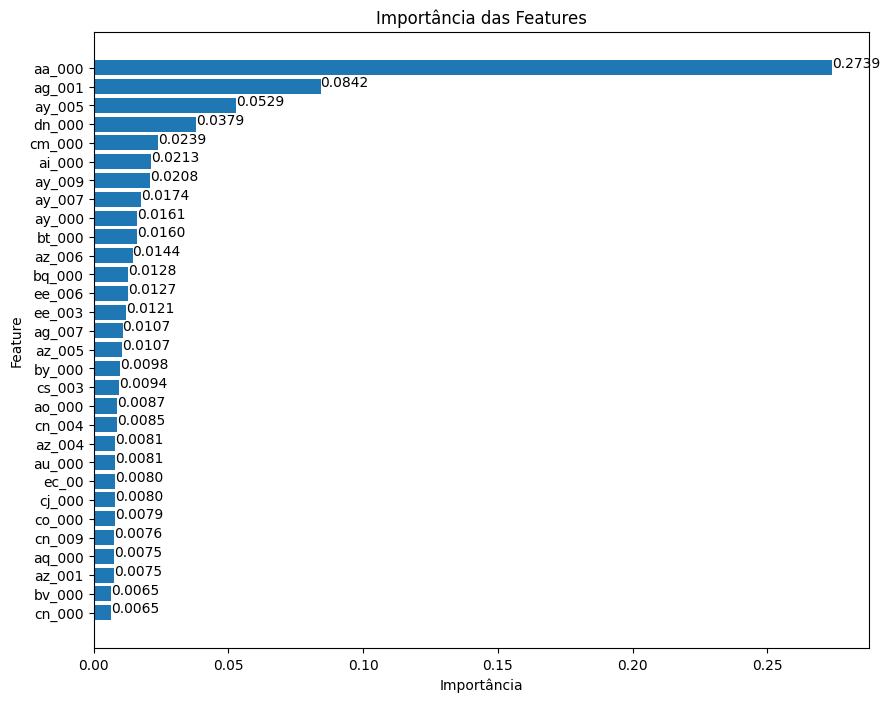

In [ ]:
# Obtendo a importância das features
feature_importances = clf.feature_importances_
features = X.columns

# Criando um DataFrame para a visualização
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Limitando o número de features a exibir
top_n = 30
importances_df = importances_df.head(top_n)

# Plotando a importância das features
plt.figure(figsize=(10, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features')
plt.gca().invert_yaxis()

# Colocando os valores nas barras
for index, value in enumerate(importances_df['Importance']):
    plt.text(value, index, f'{value:.4f}')

plt.show()


# *Comparando Árvore de Decisão e Regressão Logística *

In [ ]:
# Escalando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inicializando e treinar o modelo de Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_clf = clf.predict(X_test)
y_proba_clf = clf.predict_proba(X_test)[:, 1]

# Avaliando o desempenho do modelo Decision Tree
accuracy_clf = accuracy_score(y_test, y_pred_clf)
roc_auc_clf = roc_auc_score(y_test, y_proba_clf)
cv_scores_clf = cross_val_score(clf, X, y, cv=5).mean()

print("Decision Tree - Acurácia:", accuracy_clf)
print("Decision Tree - ROC AUC:", roc_auc_clf)
print("Decision Tree - Validação Cruzada Média:", cv_scores_clf)

# Inicializando e treinaando o modelo de Regressão Logística
log_reg = LogisticRegression(random_state=42, max_iter=20000, solver='liblinear')
log_reg.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_log_reg = log_reg.predict(X_test)
y_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Avaliando o desempenho do modelo de Regressão Logística
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_proba_log_reg)
cv_scores_log_reg = cross_val_score(log_reg, X, y, cv=5).mean()

print("Regressão Logística - Acurácia:", accuracy_log_reg)
print("Regressão Logística - ROC AUC:", roc_auc_log_reg)
print("Regressão Logística - Validação Cruzada Média:", cv_scores_log_reg)

# Comparando os modelos
if roc_auc_clf > roc_auc_log_reg:
    best_model = "Decision Tree"
else:
    best_model = "Regressão Logística"

print(f"Melhor modelo baseado em ROC AUC: {best_model}")


Decision Tree - Acurácia: 0.9863333333333333
Decision Tree - ROC AUC: 0.7730166911025602
Decision Tree - Validação Cruzada Média: 0.9870833333333333
Regressão Logística - Acurácia: 0.986
Regressão Logística - ROC AUC: 0.9632557253618967
Regressão Logística - Validação Cruzada Média: 0.9868500000000001
Melhor modelo baseado em ROC AUC: Regressão Logística


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression # Assuming you want to use Logistic Regression

# Define the model
best_model = LogisticRegression() # You can replace this with your desired model

# Otimização de hiperparâmetros com GridSearchCV
param_grid = {
    "Decision Tree": {"max_depth": [3, 5, 10, None], "min_samples_split": [2, 5, 10]},
    "Logistic Regression": {"C": [0.1, 1, 10, 100]},
    "Random Forest": {"n_estimators": [10, 50, 100], "max_features": ['auto', 'sqrt', 'log2']}
}

# Ensure best_model_name is defined - replace with your actual model name
best_model_name = "Logistic Regression"

grid_search = GridSearchCV(best_model, param_grid[best_model_name], cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(f"Melhores hiperparâmetros para {best_model_name}: {grid_search.best_params_}")

In [ ]:
from sklearn.preprocessing import StandardScaler

# Escalando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Escalando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definindo o modelo com um número maior de iterações
best_model = LogisticRegression(max_iter=5000)

# Otimização de hiperparâmetros com GridSearchCV
param_grid = {
    "Decision Tree": {"max_depth": [3, 5, 10, None], "min_samples_split": [2, 5, 10]},
    "Logistic Regression": {
        "C": [0.1, 1, 10, 100],
        "solver": ['lbfgs', 'liblinear']  # Focando em solvers que geralmente convergem bem
    },
    "Random Forest": {"n_estimators": [10, 50, 100], "max_features": ['auto', 'sqrt', 'log2']}
}

# Garantir que best_model_name está definido - substituir pelo nome do seu modelo real
best_model_name = "Logistic Regression"

grid_search = GridSearchCV(best_model, param_grid[best_model_name], cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

print(f"Melhores hiperparâmetros para {best_model_name}: {grid_search.best_params_}")


Melhores hiperparâmetros para Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}


**Melhoria de Hiperparâmetros**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Treinar o modelo final com os melhores hiperparâmetros
final_model = LogisticRegression(C=0.1, solver='liblinear', max_iter=5000)
final_model.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred = final_model.predict(X_test_scaled)
y_pred_proba = final_model.predict_proba(X_test_scaled)[:, 1]

# Avaliar o desempenho
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     11788
           1       0.67      0.42      0.51       212

    accuracy                           0.99     12000
   macro avg       0.83      0.71      0.75     12000
weighted avg       0.98      0.99      0.98     12000

Confusion Matrix:
 [[11744    44]
 [  124    88]]
ROC AUC Score: 0.9639327810181124


In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicando SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Treinando o modelo com os dados balanceados
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Previsões
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Avaliação
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     11788
           1       0.71      0.70      0.70       212

    accuracy                           0.99     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.99      0.99      0.99     12000

Confusion Matrix:
 [[11727    61]
 [   64   148]]
ROC AUC Score: 0.9831510378318854


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicando SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Treinando o modelo com os dados balanceados
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Previsões
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Avaliação
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     11788
           1       0.42      0.80      0.55       212

    accuracy                           0.98     12000
   macro avg       0.71      0.89      0.77     12000
weighted avg       0.99      0.98      0.98     12000

Confusion Matrix:
 [[11559   229]
 [   43   169]]
ROC AUC Score: 0.9808223585225782


In [ ]:
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicando SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Treinando o modelo com os dados balanceados
model = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Previsões
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Avaliação
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


[LightGBM] [Info] Number of positive: 47212, number of negative: 47212
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.265315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 40129
[LightGBM] [Info] Number of data points in the train set: 94424, number of used features: 170
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     11788
           1       0.65      0.77      0.71       212

    accuracy                           0.99     12000
   macro avg       0.82      0.88      0.85     12000
weighted avg       0.99      0.99      0.99     12000

Confusion Matrix:
 [[11701    87]
 [   49   163]]
ROC AUC Score: 0.9832036577011478


**Colocando o Modelo em Produção**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignorando os avisos de convergência
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Separando as features e o alvo
X = df.drop(columns=['class'])  # Substitua 'target' pelo nome da sua coluna alvo
y = df['class']

# Definindo o pipeline de pré-processamento e modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression())
])

# Otimização de hiperparâmetros com GridSearchCV
param_grid = {
    'logistic_regression__C': [0.1, 1, 10, 100],
    'logistic_regression__solver': ['lbfgs', 'saga'],
    'logistic_regression__max_iter': [2000]
}

# Criando o GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')

# Treinar o modelo
grid_search.fit(X, y)

# Salvando o melhor modelo encontrado
best_model = grid_search.best_estimator_
import joblib
joblib.dump(best_model, 'best_model.pkl')

# Carregando o modelo (em um ambiente de produção)
loaded_model = joblib.load('best_model.pkl')

# Fazer previsões em novos dados
# new_data deve ser um DataFrame com a mesma estrutura que o usado para treinar o modelo
new_data = pd.DataFrame([[...]], columns=X.columns)
new_predictions = loaded_model.predict(new_data)

print(f"Melhores hiperparâmetros para Logistic Regression: {grid_search.best_params_}")
print(new_predictions)
